In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from pprint import pprint

In [30]:
url = 'https://api.covidtracking.com/v1/states/mi/daily.json'
response = (requests.get(url).json())

In [76]:
covid_df = pd.DataFrame(response)
covid_df


,date,state,positive,negative,pending,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,...,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,20200923,MI,131259,3293848.0,NaN,3425107,501.0,None,146.0,None,...,3425107,16,0,31f3951f689d05d3416dabd37842d31d1ba026b8,0,0,0,0,0,
1,20200922,MI,130357,3260521.0,NaN,3390878,501.0,None,146.0,None,...,3390878,16,0,d9ea925bffd34bd7ae8bc315c33a56167d99ea05,0,0,0,0,0,
2,20200921,MI,129662,3241005.0,NaN,3370667,501.0,None,146.0,None,...,3370667,12,0,e9011c38da4499931fd6b69bc0d67a537867c520,0,0,0,0,0,
3,20200920,MI,128087,3190382.0,NaN,3318469,557.0,None,150.0,None,...,3318469,0,0,696c50a64c4e55f0a730a5edf8659e1159f2ed4a,0,0,0,0,0,
4,20200919,MI,128087,3190382.0,NaN,3318469,557.0,None,150.0,None,...,3318469,15,0,953602ddfb868cd34b3fc0502112f9a0cbe31348,0,0,0,0,0,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,20200305,MI,100,8.0,NaN,108,NaN,None,NaN,None,...,108,0,0,e6a201a048b0a2c1f7c38351715bee9fed92480d,0,0,0,0,0,
203,20200304,MI,74,NaN,NaN,74,NaN,None,NaN,None,...,74,0,0,6580caa6f6ad47e4773cb971727bf8657c1acd25,0,0,0,0,0,
204,20200303,MI,50,NaN,NaN,50,NaN,None,NaN,None,...,50,0,0,6d861c1a4593a3bbdddc27a097d0c8c5c2ab7000,0,0,0,0,0,
205,20200302,MI,27,NaN,NaN,27,NaN,None,NaN,None,...,27,0,0,885053baf642426d9937c11d8706b58c94506581,0,0,0,0,0,


In [80]:
covid_dates = [datetime.date(int(str(x)[0:4]), int(str(x)[5]), int(str(x)[6:8])) for x in covid_df['date']]
covid_df['datetimes']=covid_dates
covid_df

,date,state,positive,negative,pending,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,...,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade,datetimes
0,20200923,MI,131259,3293848.0,NaN,3425107,501.0,None,146.0,None,...,16,0,31f3951f689d05d3416dabd37842d31d1ba026b8,0,0,0,0,0,,2020-09-23
1,20200922,MI,130357,3260521.0,NaN,3390878,501.0,None,146.0,None,...,16,0,d9ea925bffd34bd7ae8bc315c33a56167d99ea05,0,0,0,0,0,,2020-09-22
2,20200921,MI,129662,3241005.0,NaN,3370667,501.0,None,146.0,None,...,12,0,e9011c38da4499931fd6b69bc0d67a537867c520,0,0,0,0,0,,2020-09-21
3,20200920,MI,128087,3190382.0,NaN,3318469,557.0,None,150.0,None,...,0,0,696c50a64c4e55f0a730a5edf8659e1159f2ed4a,0,0,0,0,0,,2020-09-20
4,20200919,MI,128087,3190382.0,NaN,3318469,557.0,None,150.0,None,...,15,0,953602ddfb868cd34b3fc0502112f9a0cbe31348,0,0,0,0,0,,2020-09-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,20200305,MI,100,8.0,NaN,108,NaN,None,NaN,None,...,0,0,e6a201a048b0a2c1f7c38351715bee9fed92480d,0,0,0,0,0,,2020-03-05
203,20200304,MI,74,NaN,NaN,74,NaN,None,NaN,None,...,0,0,6580caa6f6ad47e4773cb971727bf8657c1acd25,0,0,0,0,0,,2020-03-04
204,20200303,MI,50,NaN,NaN,50,NaN,None,NaN,None,...,0,0,6d861c1a4593a3bbdddc27a097d0c8c5c2ab7000,0,0,0,0,0,,2020-03-03
205,20200302,MI,27,NaN,NaN,27,NaN,None,NaN,None,...,0,0,885053baf642426d9937c11d8706b58c94506581,0,0,0,0,0,,2020-03-02


In [81]:
covid_df['date'] = covid_df['date'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))
del covid_df['pending'], covid_df['hospitalizedCumulative'], covid_df['inIcuCumulative']

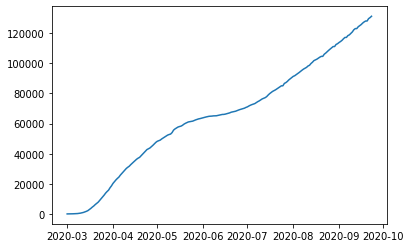

In [82]:
plt.plot(covid_df['datetimes'], covid_df['positive'])



In [83]:
emp_comb_path = 'Resources/Employment Combined - State - Daily.csv'

emp_comb_df = pd.read_csv(emp_comb_path)
mi_emp_comb_df = emp_comb_df.loc[emp_comb_df['statefips']==26]
mi_emp_comb_df

,year,month,day,statefips,emp_combined,emp_combined_inclow,emp_combined_incmiddle,emp_combined_inchigh,emp_combined_ss40,emp_combined_ss60,emp_combined_ss65,emp_combined_ss70
22,2020,1,15,26,-0.001230,-.000268,-.00115,-0.00255,-.000196,-.00234,.000193,-.00555
73,2020,1,16,26,-0.000679,.000682,-.000624,-0.00245,-.000276,-.0022,.000653,-.00418
124,2020,1,17,26,-0.000132,.00163,-.0000949,-0.00235,-.000307,-.00203,.00112,-.00278
175,2020,1,18,26,0.000427,.00262,.000434,-0.00226,-.000312,-.00186,.00164,-.00117
226,2020,1,19,26,0.000985,.00361,.000963,-0.00216,-.000317,-.00169,.00215,.000433
...,...,...,...,...,...,...,...,...,...,...,...,...
9814,2020,7,25,26,-0.063600,-.179,-.0343,0.01490,-.0696,-.0566,-.106,-.101
9865,2020,7,26,26,-0.063500,-.179,-.034,0.01440,-.0693,-.0559,-.107,-.101
9916,2020,7,27,26,-0.063500,-.179,-.0336,0.01390,-.069,-.0551,-.107,-.0997
9967,2020,7,28,26,-0.063500,-.179,-.0333,0.01340,-.0688,-.0544,-.107,-.0988


In [84]:
date = []
per_change = []
for x in mi_emp_comb_df.index:
    date.append(datetime.date(mi_emp_comb_df.loc[x, 'year'],mi_emp_comb_df.loc[x, 'month'],mi_emp_comb_df.loc[x, 'day']))
    per_change.append(mi_emp_comb_df.loc[x, 'emp_combined'])



#str(mi_emp_comb_df.loc[x,'year'])+ '0'+str(mi_emp_comb_df.loc[x,'month'])

In [85]:
mi_emp_comb_df.loc[:, 'emp_combined'] *= 100
mi_emp_comb_df.style.format({'emp_combined': '{0:,.5f}%'})

C:\Users\state\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,year,month,day,statefips,emp_combined,emp_combined_inclow,emp_combined_incmiddle,emp_combined_inchigh,emp_combined_ss40,emp_combined_ss60,emp_combined_ss65,emp_combined_ss70
22,2020,1,15,26,-0.12300%,-.000268,-.00115,-0.002550,-.000196,-.00234,.000193,-.00555
73,2020,1,16,26,-0.06790%,.000682,-.000624,-0.002450,-.000276,-.0022,.000653,-.00418
124,2020,1,17,26,-0.01320%,.00163,-.0000949,-0.002350,-.000307,-.00203,.00112,-.00278
175,2020,1,18,26,0.04270%,.00262,.000434,-0.002260,-.000312,-.00186,.00164,-.00117
226,2020,1,19,26,0.09850%,.00361,.000963,-0.002160,-.000317,-.00169,.00215,.000433
277,2020,1,20,26,0.15400%,.0046,.00149,-0.002070,-.000322,-.00152,.00267,.00204
328,2020,1,21,26,0.20500%,.00539,.00202,-0.001970,-.000369,-.00136,.00313,.00331
379,2020,1,22,26,0.25500%,.00618,.00255,-0.001870,-.000388,-.00118,.00358,.00452
430,2020,1,23,26,0.26000%,.00595,.00252,-0.001320,-.000475,-.000452,.00355,.00498
481,2020,1,24,26,0.26100%,.00558,.00249,-0.000773,-.000606,.000234,.00348,.00538


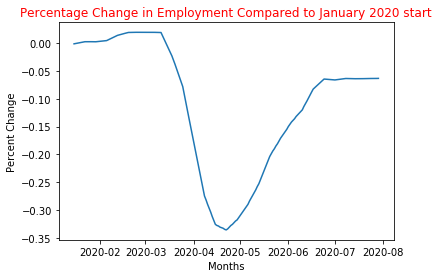

In [86]:
x_values = date
y_values = per_change
count = 0
for x in per_change:
    per_change

plt.plot(x_values, y_values)
plt.xlabel('Months')
plt.ylabel('Percent Change')
plt.title('Percentage Change in Employment Compared to January 2020 start', color = 'red')
plt.show()



In [88]:
for x in covid_df['datetimes']:
    print(x)

2020-09-23
2020-09-22
2020-09-21
2020-09-20
2020-09-19
2020-09-18
2020-09-17
2020-09-16
2020-09-15
2020-09-14
2020-09-13
2020-09-12
2020-09-11
2020-09-10
2020-09-09
2020-09-08
2020-09-07
2020-09-06
2020-09-05
2020-09-04
2020-09-03
2020-09-02
2020-09-01
2020-08-31
2020-08-30
2020-08-29
2020-08-28
2020-08-27
2020-08-26
2020-08-25
2020-08-24
2020-08-23
2020-08-22
2020-08-21
2020-08-20
2020-08-19
2020-08-18
2020-08-17
2020-08-16
2020-08-15
2020-08-14
2020-08-13
2020-08-12
2020-08-11
2020-08-10
2020-08-09
2020-08-08
2020-08-07
2020-08-06
2020-08-05
2020-08-04
2020-08-03
2020-08-02
2020-08-01
2020-07-31
2020-07-30
2020-07-29
2020-07-28
2020-07-27
2020-07-26
2020-07-25
2020-07-24
2020-07-23
2020-07-22
2020-07-21
2020-07-20
2020-07-19
2020-07-18
2020-07-17
2020-07-16
2020-07-15
2020-07-14
2020-07-13
2020-07-12
2020-07-11
2020-07-10
2020-07-09
2020-07-08
2020-07-07
2020-07-06
2020-07-05
2020-07-04
2020-07-03
2020-07-02
2020-07-01
2020-06-30
2020-06-29
2020-06-28
2020-06-27
2020-06-26
2020-06-25

In [93]:
covid_pos_cases = []
for day in date:
    covid_df.loc[covid_df['datetimes']==day]
    


Empty DataFrame
Columns: [date, state, positive, negative, totalTestResults, hospitalizedCurrently, inIcuCurrently, onVentilatorCurrently, onVentilatorCumulative, recovered, dataQualityGrade, lastUpdateEt, dateModified, checkTimeEt, death, hospitalized, dateChecked, totalTestsViral, positiveTestsViral, negativeTestsViral, positiveCasesViral, deathConfirmed, deathProbable, totalTestEncountersViral, totalTestsPeopleViral, totalTestsAntibody, positiveTestsAntibody, negativeTestsAntibody, totalTestsPeopleAntibody, positiveTestsPeopleAntibody, negativeTestsPeopleAntibody, totalTestsPeopleAntigen, positiveTestsPeopleAntigen, totalTestsAntigen, positiveTestsAntigen, fips, positiveIncrease, negativeIncrease, total, totalTestResultsSource, totalTestResultsIncrease, posNeg, deathIncrease, hospitalizedIncrease, hash, commercialScore, negativeRegularScore, negativeScore, positiveScore, score, grade, datetimes]
Index: []

[0 rows x 52 columns]
Empty DataFrame
Columns: [date, state, positive, negati

          date state  positive  negative  totalTestResults  \
203 2020-03-04    MI        74       NaN                74   

     hospitalizedCurrently  inIcuCurrently  onVentilatorCurrently  \
203                    NaN             NaN                    NaN   

    onVentilatorCumulative  recovered  ... deathIncrease hospitalizedIncrease  \
203                   None        NaN  ...             0                    0   

                                         hash commercialScore  \
203  6580caa6f6ad47e4773cb971727bf8657c1acd25               0   

     negativeRegularScore negativeScore positiveScore  score  grade  \
203                     0             0             0      0          

      datetimes  
203  2020-03-04  

[1 rows x 52 columns]
          date state  positive  negative  totalTestResults  \
202 2020-03-05    MI       100       8.0               108   

     hospitalizedCurrently  inIcuCurrently  onVentilatorCurrently  \
202                    NaN             NaN    

[1 rows x 52 columns]
          date state  positive  negative  totalTestResults  \
179 2020-03-28    MI     14865   15902.0             30767   

     hospitalizedCurrently  inIcuCurrently  onVentilatorCurrently  \
179                    NaN             NaN                    NaN   

    onVentilatorCumulative  recovered  ... deathIncrease hospitalizedIncrease  \
179                   None        NaN  ...            71                    0   

                                         hash commercialScore  \
179  cc04102864497d4c45248eae2eb1f35cac14b981               0   

     negativeRegularScore negativeScore positiveScore  score  grade  \
179                     0             0             0      0          

      datetimes  
179  2020-03-28  

[1 rows x 52 columns]
          date state  positive  negative  totalTestResults  \
178 2020-03-29    MI     15784   17417.0             33201   

     hospitalizedCurrently  inIcuCurrently  onVentilatorCurrently  \
178                    N

[1 rows x 52 columns]
          date state  positive  negative  totalTestResults  \
156 2020-04-20    MI     38494   93393.0            131887   

     hospitalizedCurrently  inIcuCurrently  onVentilatorCurrently  \
156                 3374.0          1346.0                 1102.0   

    onVentilatorCumulative  recovered  ... deathIncrease hospitalizedIncrease  \
156                   None     3237.0  ...           111                    0   

                                         hash commercialScore  \
156  2a91998de474cac844efdd2508e87dc8267df73a               0   

     negativeRegularScore negativeScore positiveScore  score  grade  \
156                     0             0             0      0          

      datetimes  
156  2020-04-20  

[1 rows x 52 columns]
          date state  positive  negative  totalTestResults  \
155 2020-04-21    MI     39589   99667.0            139256   

     hospitalizedCurrently  inIcuCurrently  onVentilatorCurrently  \
155                 3357

          date state  positive  negative  totalTestResults  \
135 2020-05-11    MI     54004  278293.0            332297   

     hospitalizedCurrently  inIcuCurrently  onVentilatorCurrently  \
135                 1424.0           685.0                  557.0   

    onVentilatorCumulative  recovered  ... deathIncrease hospitalizedIncrease  \
135                   None    22686.0  ...            58                    0   

                                         hash commercialScore  \
135  a864fce830af1f777b9225a7548b4190b85903d2               0   

     negativeRegularScore negativeScore positiveScore  score  grade  \
135                     0             0             0      0          

      datetimes  
135  2020-05-11  

[1 rows x 52 columns]
          date state  positive  negative  totalTestResults  \
134 2020-05-12    MI     55641  291701.0            347342   

     hospitalizedCurrently  inIcuCurrently  onVentilatorCurrently  \
134                 1384.0           693.0    

          date state  positive  negative  totalTestResults  \
112 2020-06-03    MI     64382  613173.0            677555   

     hospitalizedCurrently  inIcuCurrently  onVentilatorCurrently  \
112                  646.0           328.0                  224.0   

    onVentilatorCumulative  recovered  ... deathIncrease hospitalizedIncrease  \
112                   None    38099.0  ...            15                    0   

                                         hash commercialScore  \
112  a38c9b798b42f09169999610ab2bc4f4928f5f9d               0   

     negativeRegularScore negativeScore positiveScore  score  grade  \
112                     0             0             0      0          

      datetimes  
112  2020-06-03  

[1 rows x 52 columns]
          date state  positive  negative  totalTestResults  \
111 2020-06-04    MI     64616  627907.0            692523   

     hospitalizedCurrently  inIcuCurrently  onVentilatorCurrently  \
111                  617.0           321.0    

[1 rows x 52 columns]
         date state  positive  negative  totalTestResults  \
90 2020-06-25    MI     68989  893850.0            962839   

    hospitalizedCurrently  inIcuCurrently  onVentilatorCurrently  \
90                  557.0           193.0                  115.0   

   onVentilatorCumulative  recovered  ... deathIncrease hospitalizedIncrease  \
90                   None    49290.0  ...            19                    0   

                                        hash commercialScore  \
90  b47fdf525c8b5a20cdcbe68a7997758df4fd4c1b               0   

    negativeRegularScore negativeScore positiveScore  score  grade   datetimes  
90                     0             0             0      0         2020-06-25  

[1 rows x 52 columns]
         date state  positive  negative  totalTestResults  \
89 2020-06-26    MI     69329  912377.0            981706   

    hospitalizedCurrently  inIcuCurrently  onVentilatorCurrently  \
89                  557.0           193.0           

[1 rows x 52 columns]
         date state  positive   negative  totalTestResults  \
71 2020-07-14    MI     77864  1255922.0           1333786   

    hospitalizedCurrently  inIcuCurrently  onVentilatorCurrently  \
71                  543.0           184.0                  109.0   

   onVentilatorCumulative  recovered  ... deathIncrease hospitalizedIncrease  \
71                   None    53867.0  ...             5                    0   

                                        hash commercialScore  \
71  0cb781d8796967f373ccb49bac39fe447e91318c               0   

    negativeRegularScore negativeScore positiveScore  score  grade   datetimes  
71                     0             0             0      0         2020-07-14  

[1 rows x 52 columns]
         date state  positive   negative  totalTestResults  \
70 2020-07-15    MI     78913  1289006.0           1367919   

    hospitalizedCurrently  inIcuCurrently  onVentilatorCurrently  \
70                  543.0           184.0       

[1 rows x 52 columns]
